In [0]:
import pandas as pd

In [2]:
pasta_projeto = "/content/drive/My Drive/ColabNotebooks/Projetos Portifolio/Monkey Species Prediction"
dados = pd.read_csv(pasta_projeto+'/monkey_labels.txt', sep = ",", header = 0, index_col = 0)
dados.head()

,Latin Name,Common Name,Train Images,Validation Images
Label,,,,
n0,alouatta_palliata\t,mantled_howler,131,26
n1,erythrocebus_patas\t,patas_monkey,139,28
n2,cacajao_calvus\t,bald_uakari,137,27
n3,macaca_fuscata\t,japanese_macaque,152,30
n4,cebuella_pygmea\t,pygmy_marmoset,131,26


In [3]:
nomes = dados[' Common Name                   ']
name = []
for i in nomes:
  name.append(i.strip().replace("_", " "))

name

['mantled howler',
 'patas monkey',
 'bald uakari',
 'japanese macaque',
 'pygmy marmoset',
 'white headed capuchin',
 'silvery marmoset',
 'common squirrel monkey',
 'black headed night monkey',
 'nilgiri langur']

In [0]:
from tensorflow.keras.models import model_from_json

json_file = open(pasta_projeto+'/melhor_modelo.json', 'r')
model = json_file.read()
json_file.close()
model = model_from_json(model)
model.load_weights(pasta_projeto+'/melhor_peso.best.hdf5')

In [5]:
import os, cv2
import numpy as np

imagens = pasta_projeto+'/dados/testing/n5'
imagem = os.listdir(imagens)[0]
imagem = imagens+'/'+imagem

img = cv2.imread(imagem)  
img = img/255

tam = 128
img = cv2.resize(img, (tam, tam))

teste = []
teste.append(img)
teste = np.array(teste)

teste.shape

(1, 128, 128, 3)

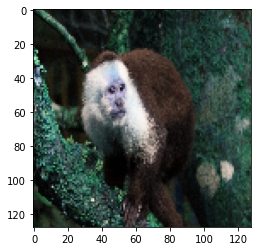

In [6]:
import matplotlib.pyplot as plt

plt.imshow(teste[0])

In [10]:
result = []
pred = model.predict_on_batch(teste)
result.append(pred)

result = np.asarray(result)
imprime = np.array(result[0][0])
print(np.argmax(imprime))

5


In [0]:
np.argmax(result)

5

In [0]:
pasta_imagens = pasta_projeto+'/dados/testing'

imagens = os.listdir(pasta_imagens)
imagens.sort()

resultado_final = []

for i in imagens:
  imagem = pasta_imagens+'/'+i
  
  print('Categoria '+i)

  resultado_modelo = []

  for j in os.listdir(imagem):
    imgs = imagem+'/'+j

    img = cv2.imread(imgs) 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    img = img/255

    tam = 128
    img = cv2.resize(img, (tam, tam))

    teste = []
    teste.append(img)
    teste = np.array(teste)
    
    result = []
    pred = model.predict_on_batch(teste)
    result.append(pred)

    result = np.asarray(result)
    imprime = np.array(result[0][0])
    resultado_final.append(np.argmax(imprime))

    resultado_modelo.append(np.argmax(imprime))
  print(resultado_modelo)
  print()

Categoria n0
[0, 0, 0, 9, 9, 0, 0, 0, 0, 0]

Categoria n1
[1, 5, 1, 7, 4, 1, 1, 1, 1, 1]

Categoria n2
[1, 2, 2, 2, 2, 2, 2, 2, 2, 2]

Categoria n3
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

Categoria n4
[4, 4, 4, 4, 5, 4, 1, 4, 4, 4]

Categoria n5
[5, 5, 5, 5, 5, 9, 5, 5, 5, 5]

Categoria n6
[4, 6, 6, 6, 6, 6, 6, 6, 6, 6]

Categoria n7
[7, 7, 5, 7, 7, 7, 7, 7, 6, 7]

Categoria n8
[8, 8, 8, 8, 8, 8, 8, 8, 8, 8]

Categoria n9
[9, 9, 9, 9, 9, 9, 9, 9, 9, 9]



In [0]:
y_teste = np.zeros((100, 1))

for i in range(0, 100):
  y_teste[i] = int(i/10)

In [0]:
resultado_final = np.array(resultado_final)
resultado_final.shape

(100,)

In [0]:
resultado_final = np.reshape(resultado_final, (100, 1))

In [0]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_true = y_teste, 
                              y_pred = resultado_final)
confusion

array([[ 8,  0,  0,  0,  0,  0,  0,  0,  0,  2],
       [ 0,  7,  0,  0,  1,  1,  0,  1,  0,  0],
       [ 0,  1,  9,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 10,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  8,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  9,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  1,  0,  9,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  1,  8,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 10,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 10]])

In [0]:
%matplotlib inline
import itertools

def plot_confusion_matrix(cm, classes,
    normalize=False,
    title='Matriz de Confusão',
    cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Label Verdadeiras')
    plt.xlabel('Labels da Previsão')

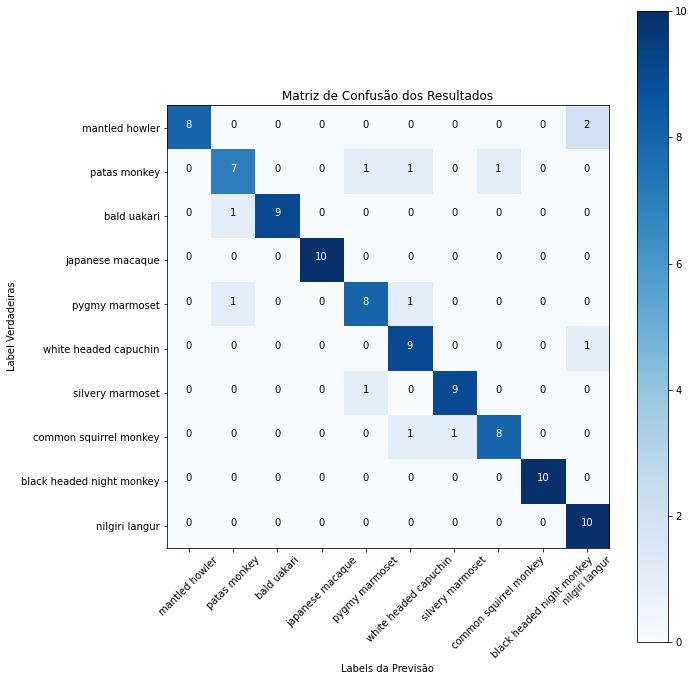

In [0]:
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm = confusion, classes = name, title = 'Matriz de Confusão dos Resultados')